<a href="https://colab.research.google.com/github/lenguyentiendat/CS231---Intro-to-CV/blob/main/20521167.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Section: Thông tin
1.MSSV: 20521167

2.Họ và tên : Lê Nguyễn Tiến Đạt

3.Bài tập : Edge detection

4.Ngày thực hiện: 7/3/2022

#Yêu cầu 1

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import os
dir_monhoc = '/gdrive/MyDrive/CS231.M21.KHCL'

dir_baitap = os.path.join(dir_monhoc, 'Baitap', 'Baitap2')
dir_images = os.path.join(dir_baitap, 'images')

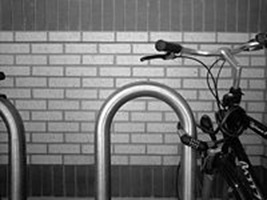

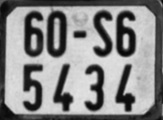

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
from scipy.spatial import distance


path_filename = os.path.join(dir_images, 'Bicycle.jpg')
img = cv.imread(path_filename, 0)

path_filename2 = os.path.join(dir_images, 'bansoxe.jpg')
img2 = cv.imread(path_filename2, 0)

cv2_imshow(img)
cv2_imshow(img2)


In [ ]:
def sobel_filters(img):
   Sx = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]],np.float32)
   Sy = np.array([[1,2,1],[0,0,0],[-1,-2,-1]],np.float32)

   Ix = cv.filter2D(img, -1, Sx)
   Iy = cv.filter2D(img, -1, Sy)

   G = np.hypot(Ix,Iy)
   G = G/G.max()*255
   theta = np.arctan2(Iy,Ix)

   return Ix,Iy,G,theta
                 

In [ ]:
def show2image(img_src, img_rst, title1, title2):
  plt.figure(figsize=(20, 20))

  plt.subplot(1,2,1)
  plt.title(title1)
  img_src = cv2.cvtColor(img_src.astype(np.uint8), cv2.COLOR_BGR2RGB)
  plt.imshow(img_src, interpolation='bicubic')

  plt.subplot(1,2,2)
  plt.title(title2)
  img_rst = cv2.cvtColor(img_rst.astype(np.uint8), cv2.COLOR_BGR2RGB)
  plt.imshow(img_rst, interpolation='bicubic')



In [ ]:
picture1 = 'Bicycle.jpg'
picture2 = 'bansoxe.jpg'



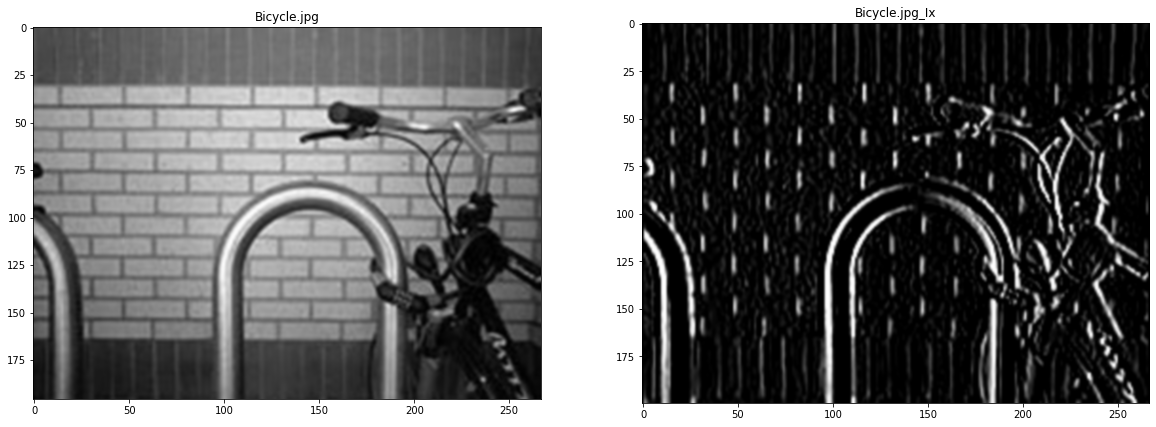

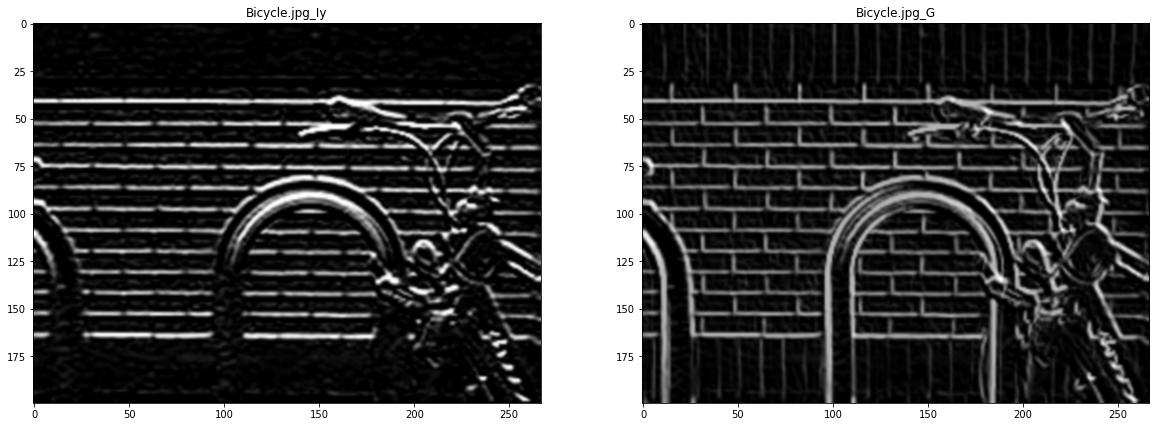

In [ ]:
Ix,Iy,G,theta = sobel_filters(img)
img = img[:-4]
show2image(img, Ix, picture1 , picture1+'_Ix')
show2image(Iy, G, picture1+'_Iy', picture1+'_G')

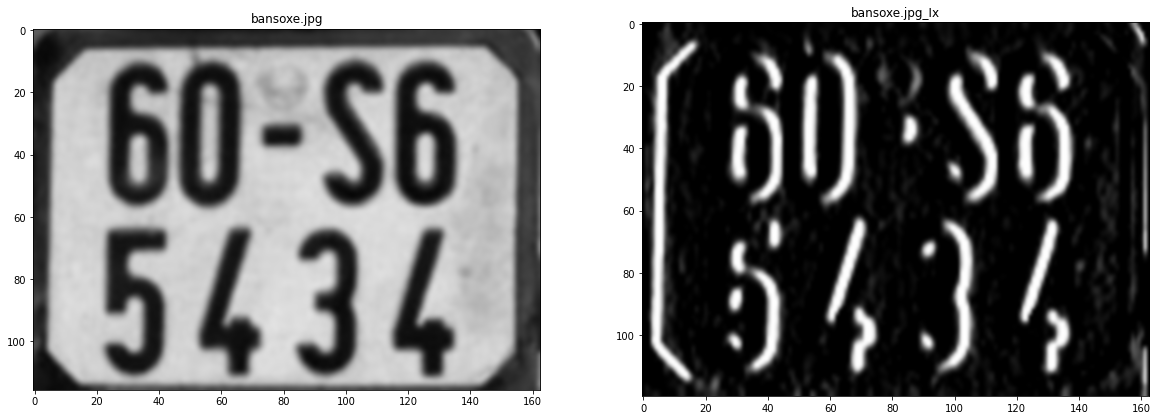

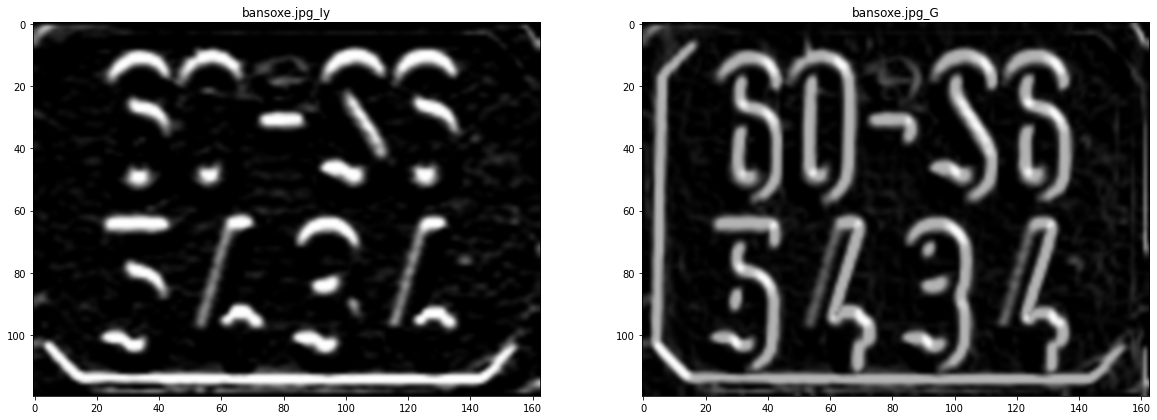

In [ ]:
Ix,Iy,G,theta = sobel_filters(img2)
img2 = img2[:-4]
show2image(img2, Ix, picture2 , picture2+'_Ix')
show2image(Iy, G, picture2+'_Iy', picture2+'_G')

#Yêu cầu 2


In [ ]:
def calFeartureVector(img):
  img_ = cv.resize(img, (256, 256))
  _, _, G, _ = sobel_filters(img_)
  row_sum = np.sum(G, axis=1, dtype=np.float64)
  col_sum = np.sum(G, axis=0, dtype=np.float64)
  return (np.hstack((row_sum.T, col_sum)))

In [ ]:
path_filename3 = os.path.join(dir_images,'image_0814.jpg')
img3 = cv.imread(path_filename3,0)

path_filename4 = os.path.join(dir_images,'image_0816.jpg')
img4 = cv.imread(path_filename4,0)

path_filename5 = os.path.join(dir_images,'image_1248.jpg')
img5 = cv.imread(path_filename5,0)

In [ ]:
a = calFeartureVector(img3)
b = calFeartureVector(img4)
c = calFeartureVector(img5)

In [ ]:
print(np.linalg.norm(a-b)) #euclidean distance giữa image_0814 và image_0816

55432.88078311733


In [ ]:
print(np.linalg.norm(a-c)) #euclidean distance giữa image_0814 và image_1248

92123.37554385341


In [ ]:
print(1-distance.cosine(a, b)) #cosine similarity giữa image_0814 và image_0816

0.9403013260778476


In [ ]:
print(1-distance.cosine(a, c)) #cosine similarity giữa image_0814 và image_1248

0.8133452847890963
